# Introducción

Kaggle describe esta competición de la siguiente manera:

Millones de animales callejeros sufren en las calles o son sacrificados en refugios cada día en todo el mundo. Si se les encuentra un hogar, se salvarán muchas vidas preciosas y se crearán más familias felices.

PetFinder.my es la principal plataforma de bienestar animal de Malasia desde 2008, con una base de datos de más de 150.000 animales. PetFinder colabora estrechamente con amantes de los animales, medios de comunicación, empresas y organizaciones mundiales para mejorar el bienestar animal.

En este concurso se desarrollarán algoritmos para predecir la adoptabilidad de las mascotas, en concreto, con qué rapidez se adopta una mascota. 


# The target variable: Adoption Speed¶
Los concursantes deben predecir este valor. El valor viene determinado por la rapidez con la que se adopta una mascota, si es que se adopta. Los valores se determinan de la siguiente manera:

        - **0** - La mascota fue adoptada el mismo día que se incluyó en la lista.
        - **1** - La mascota fue adoptada entre 1 y 7 días (1ª semana) después de ser incluida en la lista.
        - **2** - La mascota fue adoptada entre 8 y 30 días (1er mes) después de ser incluida en la lista.
        - **3** - La mascota fue adoptada entre 31 y 90 días (2º y 3er mes) después de su inclusión en la lista.
        - **4** - Ninguna adopción después de 100 días de estar en la lista.

# Variables
| Variable        | Descripción                                                                 |
|----------------|------------------------------------------------------------------------------|
| PetID          | Identificador único encriptado del perfil de la mascota.                    |
| AdoptionSpeed  | Velocidad categórica de adopción. Cuanto menor es el número, más rápida fue la adopción. Este es el valor que se debe predecir. |
| Type           | Tipo de animal (1 = Perro, 2 = Gato).                                       |
| Name           | Nombre de la mascota (vacío si no tiene nombre).                            |
| Age            | Edad de la mascota al momento de ser listada, en meses.                     |
| Breed1         | Raza principal de la mascota (consultar el diccionario de etiquetas de razas). |
| Breed2         | Raza secundaria, si la mascota es mestiza (consultar el diccionario de etiquetas de razas). |
| Gender         | Sexo de la mascota (1 = Macho, 2 = Hembra, 3 = Mixto, si el perfil representa un grupo de mascotas). |
| Color1         | Primer color de la mascota (consultar el diccionario de etiquetas de colores). |
| Color2         | Segundo color de la mascota (consultar el diccionario de etiquetas de colores). |
| Color3         | Tercer color de la mascota (consultar el diccionario de etiquetas de colores). |
| MaturitySize   | Tamaño de la mascota cuando alcance la madurez (1 = Pequeño, 2 = Mediano, 3 = Grande, 4 = Extra grande, 0 = No especificado). |
| FurLength      | Longitud del pelaje (1 = Corto, 2 = Medio, 3 = Largo, 0 = No especificado). |
| Vaccinated     | Indica si la mascota ha sido vacunada (1 = Sí, 2 = No, 3 = No está claro).  |
| Dewormed       | Indica si la mascota ha sido desparasitada (1 = Sí, 2 = No, 3 = No está claro). |
| Sterilized     | Indica si la mascota ha sido esterilizada o castrada (1 = Sí, 2 = No, 3 = No está claro). |
| Health         | Estado de salud (1 = Saludable, 2 = Lesión menor, 3 = Lesión grave, 0 = No especificado). |
| Quantity       | Número de mascotas representadas en el perfil.                              |
| Fee            | Tarifa de adopción (0 = Gratuita).                                          |
| State          | Estado (provincia) de ubicación en Malasia (consultar el diccionario de etiquetas de estados). |
| RescuerID      | Identificador único encriptado de la persona rescatista.                    |
| VideoAmt       | Cantidad total de videos subidos para esta mascota.                         |
| PhotoAmt       | Cantidad total de fotos subidas para esta mascota.                          |
| Description    | Descripción del perfil de la mascota. El idioma principal es inglés, aunque también puede haber partes en malayo o chino. |


# Ingesta de Datos

In [19]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import lightgbm as lgb
import xgboost as xgb
from wordcloud import WordCloud

In [2]:
print(os.listdir("./input/petfinder-adoption-prediction"))

['test_images', 'breed_labels.csv', '.DS_Store', 'test', 'train_metadata', 'color_labels.csv', 'test_sentiment', 'test_metadata', 'StateLabels.csv', 'ColorLabels.csv', 'PetFinder-BreedLabels.csv', 'train_sentiment', 'train', 'BreedLabels.csv', 'PetFinder-ColorLabels.csv', 'train_images', 'PetFinder-StateLabels.csv', 'state_labels.csv']


In [44]:
breeds = pd.read_csv('./input/petfinder-adoption-prediction/breed_labels.csv')
colors = pd.read_csv('./input/petfinder-adoption-prediction/color_labels.csv')
states = pd.read_csv('./input/petfinder-adoption-prediction/state_labels.csv')

train = pd.read_csv('./input/petfinder-adoption-prediction/train/train.csv')

df = train.copy()

# Exploracion del Dataset

In [45]:
df.sample(3).T

,4401,10720,13632
Type,2,2,2
Name,NaN,Musang The Big Ears,Gardenia
Age,2,3,2
Breed1,266,266,266
Breed2,266,0,0
Gender,3,1,1
Color1,4,6,7
Color2,6,7,0
Color3,0,0,0
MaturitySize,2,1,1


In [46]:
df.shape

(14993, 24)

Distribucion de la variable target

In [47]:
df['AdoptionSpeed'].value_counts().to_frame('Cantidad').assign(Porcentaje=lambda x: x/x.sum()*100)

,Cantidad,Porcentaje
4,4197,27.993063
2,4037,26.925899
3,3259,21.736811
1,3090,20.609618
0,410,2.734609


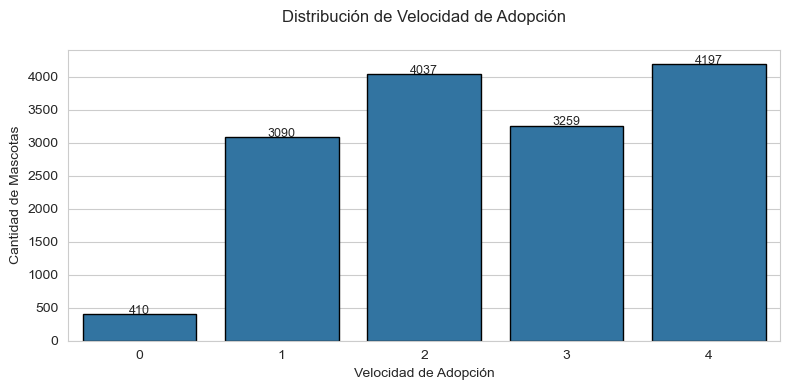

In [51]:
# Preparar datos
adoption_counts = train['AdoptionSpeed'].value_counts().sort_index().reset_index()
adoption_counts.columns = ['AdoptionSpeed', 'count']


# Crear gráfico
plt.figure(figsize=(8, 4))
ax = sns.barplot(
    data=adoption_counts,
    x='AdoptionSpeed',
    y='count',
    #palette=colors,
    edgecolor='black'
)

# Etiquetas y título
plt.title('Distribución de Velocidad de Adopción', pad=20)
plt.xlabel('Velocidad de Adopción')
plt.ylabel('Cantidad de Mascotas')

# Etiquetas sobre las barras
for i, row in adoption_counts.iterrows():
    ax.text(i, row['count'] + 2, row['count'], ha='center', fontsize=9)

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

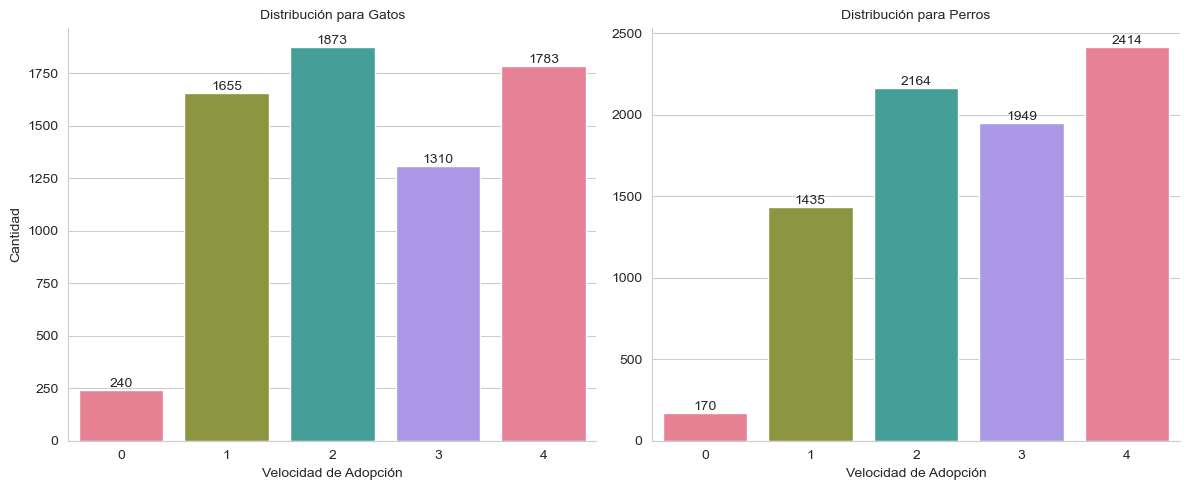

In [49]:
# Preparar los datos
plot_data = df[df['Type'].isin([1, 2])].copy()
plot_data['Type'] = plot_data['Type'].map({1: 'Perros', 2: 'Gatos'})

# Configuración
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Crear el gráfico
g = sns.FacetGrid(plot_data, col='Type', height=5, aspect=1.2, sharey=False)
g.map_dataframe(
    sns.countplot,
    x='AdoptionSpeed',
    hue='AdoptionSpeed',  # Soluciona el warning de palette
    palette='husl',
    order=sorted(plot_data['AdoptionSpeed'].unique()),
    legend=False  # Evita que muestre la leyenda de hue
)

# Configurar títulos y etiquetas
g.set_axis_labels('Velocidad de Adopción', 'Cantidad')
g.set_titles(col_template='Distribución para {col_name}')  # Corrige el KeyError

# Añadir los valores en las barras
for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container)

plt.tight_layout()
plt.show()

In [53]:
# Contar las ocurrencias de cada combinación
conteo = df.groupby(['AdoptionSpeed', 'Type']).size().reset_index(name='Conteo')

In [56]:
conteo

,AdoptionSpeed,Type,Conteo
0,0,1,170
1,0,2,240
2,1,1,1435
3,1,2,1655
4,2,1,2164
5,2,2,1873
6,3,1,1949
7,3,2,1310
8,4,1,2414
9,4,2,1783


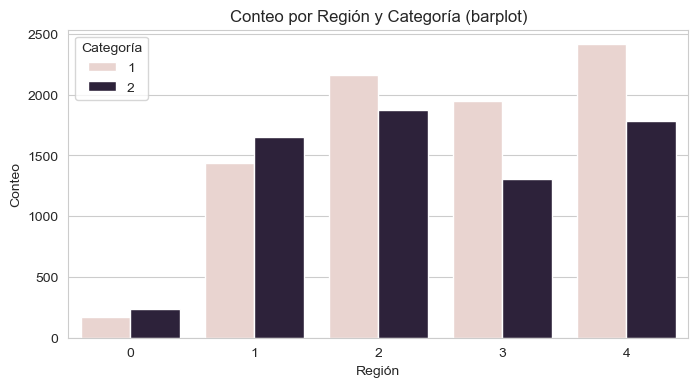

In [63]:
# Método 2: Usando barplot con los datos pre-agrupados
plt.figure(figsize=(8, 4))
sns.barplot(x='AdoptionSpeed', y='Conteo', hue='Type', data=conteo)
plt.title('Conteo por Región y Categoría (barplot)')
plt.xlabel('Región')
plt.ylabel('Conteo')
plt.legend(title='Categoría')
plt.show()

In [68]:
df['Type'] = df['Type'].apply(lambda x: 'Dog' if x == 1 else 'Cat')

In [70]:
df['Type'].value_counts().to_frame('Cantidad').assign(Porcentaje=lambda x: x/x.sum()*100)

,Cantidad,Porcentaje
Dog,8132,54.238645
Cat,6861,45.761355


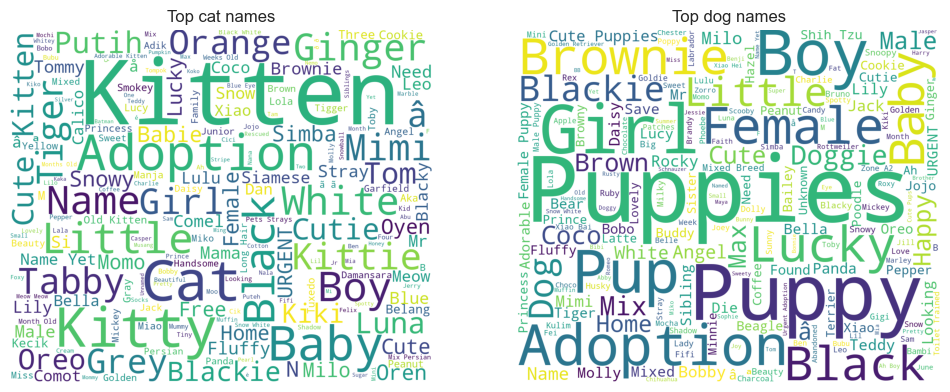

In [71]:
plt.subplot(1, 2, 1)
text_cat = ' '.join(df.loc[df['Type'] == 'Cat', 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_cat)
plt.imshow(wordcloud)
plt.title('Top cat names')
plt.axis("off")

plt.subplot(1, 2, 2)
text_dog = ' '.join(df.loc[df['Type'] == 'Dog', 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_dog)
plt.imshow(wordcloud)
plt.title('Top dog names')
plt.axis("off")

plt.show()